# 5_Libreria WFDB: Recorte de la señal

La energia de una señal discreta se define como la sumatoria del modulo de los elementos al cuadrado y por el teorema de Parseval sabemos que es igual a la sumatoria de los cuadrados de los modulos de los coeficientes de la DFT sobre la longitud de la señal.

Teniendo en cuenta esto es este ejemplo se lleva a cabo el recorte en frecuencia de una señal teniendo en cuenta que porcentaje de su energía se quiere conservar y luego se compararan los resultados con la señal original. 


Como primer paso se realiza la apertura y la DFT de la señal

In [34]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np

n = 40980
t = np.arange( 0, n, 1 )

signal, fields = wfdb.io.rdsamp('101', pb_dir='mitdb',   sampto = n)

resf = fields.get( 'fs' )/n
rangof = np.arange( 0, 360 , resf)

Y = np.fft.fft( signal[:,0] )
Ymodu = abs(Y)

Debido a que el espectro es simetrico se calcula solo la energia de la mitad del espectro, para esto se inicializan los valores y se elige el porcentaje de energia a partir del cual se va a realizar el recorte (en este caso 98%)

In [38]:
Ymitad = Ymodu[range(n//2)] 
YR = np.zeros( n, complex )
i = 0  
eOriginal = 0
porcentaje = 0.98

for i in range( n//2 ):
    eOriginal = eOriginal + ( (Ymitad[i])**2 )

En este bloque se realiza el recorte de la señal, teniendo en cuenta que se mantenga la simetría de la DFT y alamcenando el valor apartir del cual, para el porcentaje elegido, se realiza el corte en frecuencia

In [39]:
eVariable = eOriginal
for i in  np.arange( n//2-1, -1, -1 ):
    if eVariable  > ( porcentaje*eOriginal ):
        eVariable  = eVariable  - ( (Ymitad[i])**2 )
        YR[i] = 0 

        frecCorte = rangof[i]
    else:
        YR[i] = Y[i]
        YR[n-1-i] = Y[n-1-i]
        
YmoduR = abs( YR )
print("La frecuencia a partir de la cual atenuamos la señal es:",frecCorte,"Hz")

La frecuencia a partir de la cual atenuamos la señal es: 22.30453879941435 Hz


A continuación se grafican los dos espectros

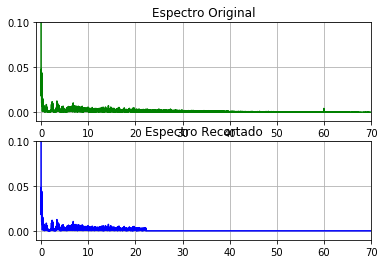

In [40]:
plt.figure( 1 )
plt.subplot( 211 )
plt.plot( rangof, Ymodu/n , 'g' )
plt.title( 'Espectro Original' )
plt.ylim( -0.01, 0.1)
plt.xlim(-1,70)
plt.grid(True)

plt.subplot ( 212 )
plt.plot( rangof, YmoduR/n , 'b' )
plt.title( 'Espectro Recortado' )
plt.ylim( -0.01, 0.1)
plt.xlim(-1,70)
plt.grid( True )

Puede notarse como el espectro de la señal se recorta a partir de la frecuencia de corte y su valor permanece en 0. Con el fin de notar a simple vista esto se ha graficado solo hasta 70Hz, si se grafica todo el espectro, es decir hasta los 360Hz puede notarse como el mismo recorte ocurre en simetria para esas frecuencias

En el siguiente bloque se realiza la antitransformada del espectro y se grafica esta señal junto a la original con el fin de analizar los efectos produciods por este recorte en frecuencia

(-0.5, 1600)

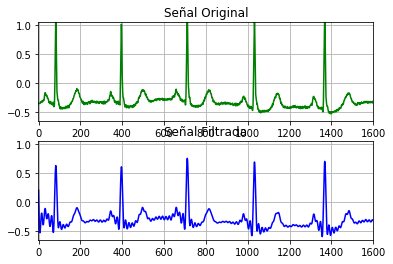

In [41]:
signalYR = np.fft.ifft( YR )
signalYR = signalYR.real

plt.figure(3)

plt.subplot( 211 )
plt.plot( t, signal[:,0], 'g'  )
plt.title( 'Señal Original' )
plt.grid( True )
plt.ylim( -0.65, 1.05 )
plt.xlim( -0.5, 1600 )

plt.subplot( 212 )
plt.plot( t, signalYR , 'b' )
plt.title( 'Señal Filtrada' )
plt.grid( True )
plt.ylim( -0.65, 1.05 )
plt.xlim( -0.5, 1600 ) 

En este ejemplo que se decidió quedar con un %98 de la señal puede notarse que la forma de la señal se mantiene, aunque no sea igual. Aproximadamente a partir del recorte de un %92 de la energía la distorsión genera una gran dificultad para distinguir el complejo QRS